In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Tratamento dos dados

A cada valor X nos dados, será substituído pela moda da feature

In [4]:
eixo_2 = pd.read_excel("/content/drive/MyDrive/Pesquisas e Projetos/Projeto Comunidades - Análise de dados/[en]Comunidadev8.xlsx").filter(["P26", "P27", "P28", "P29", "P30", "P31", "P32", "P33", "P34","P35", "P36", "P37", "P38", "P39", "P40", "P41", "P42", "P43", "P44", "P45", "P46", "P47", "P48", "P49", "P50", "perfil"])
#eixo_1 = pd.read_excel("/content/drive/MyDrive/Pesquisas e Projetos/Projeto Comunidades - Análise de dados/Comunidadev8.xlsx").filter(["P01", "P04", "P09", "P10", "P11", "P13", "P15", "P17", "P23", "P25", "perfil"])
eixo_2 = eixo_2.loc[0:169].reset_index(drop=True)
eixo_2

,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,...,P42,P43,P44,P45,P46,P47,P48,P49,P50,perfil
0,3,3,1,1,4,3,5,3,4,3,...,2,4,5,3,3,3,5,3,3,quilombola
1,3,4,4,3,4,4,4,2,4,3,...,5,3,5,4,4,1,5,3,3,quilombola
2,4,3,4,3,3,4,3,2,4,4,...,3,5,5,3,3,1,2,2,2,quilombola
3,4,3,4,2,2,4,4,3,3,3,...,3,4,5,4,3,3,3,4,3,quilombola
4,3,3,5,1,3,5,5,3,5,5,...,3,5,5,5,5,3,5,5,1,quilombola
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,5,3,5,3,2,5,5,5,3,3,...,1,5,5,5,5,5,5,5,5,fishermen
166,5,3,5,5,2,5,5,5,3,2,...,1,1,5,5,5,2,5,3,3,fishermen
167,5,2,5,3,2,2,3,4,3,3,...,3,1,5,5,5,1,5,5,5,fishermen
168,5,2,5,5,3,2,5,5,3,2,...,1,5,5,5,5,3,2,5,5,fishermen


In [5]:
for col in eixo_2.columns:
  moda = eixo_2[col][eixo_2[col] != 'X'].mode()[0]
  eixo_2[col] = eixo_2[col].replace('X', moda)
eixo_2

/tmp/ipython-input-897957965.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  eixo_2[col] = eixo_2[col].replace('X', moda)


,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,...,P42,P43,P44,P45,P46,P47,P48,P49,P50,perfil
0,3,3,1,1,4,3,5,3,4,3,...,2,4,5,3,3,3,5,3,3,quilombola
1,3,4,4,3,4,4,4,2,4,3,...,5,3,5,4,4,1,5,3,3,quilombola
2,4,3,4,3,3,4,3,2,4,4,...,3,5,5,3,3,1,2,2,2,quilombola
3,4,3,4,2,2,4,4,3,3,3,...,3,4,5,4,3,3,3,4,3,quilombola
4,3,3,5,1,3,5,5,3,5,5,...,3,5,5,5,5,3,5,5,1,quilombola
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,5,3,5,3,2,5,5,5,3,3,...,1,5,5,5,5,5,5,5,5,fishermen
166,5,3,5,5,2,5,5,5,3,2,...,1,1,5,5,5,2,5,3,3,fishermen
167,5,2,5,3,2,2,3,4,3,3,...,3,1,5,5,5,1,5,5,5,fishermen
168,5,2,5,5,3,2,5,5,3,2,...,1,5,5,5,5,3,2,5,5,fishermen


### Extração de Características

In [6]:
"""
eixo_1.replace('X', np.nan, inplace=True)
#eixo_1.replace('x', pd.NA, inplace=True)
eixo_1.dropna(inplace=True)
eixo_1 = eixo_1.reset_index()
eixo_1 = eixo_1.drop('index', axis=1)
eixo_1
"""

"\neixo_1.replace('X', np.nan, inplace=True)\n#eixo_1.replace('x', pd.NA, inplace=True)\neixo_1.dropna(inplace=True)\neixo_1 = eixo_1.reset_index()\neixo_1 = eixo_1.drop('index', axis=1)\neixo_1\n"

In [7]:
eixo_2['perfil'].unique()

array(['quilombola', 'indigenous', 'fishermen', 'urban',
       'extractivists/farmers'], dtype=object)

Padronizando tudo para float

In [8]:
eixo_2[["P26", "P27", "P28", "P29", "P30", "P31", "P32", "P33", "P34","P35", "P36", "P37", "P38", "P39", "P40", "P41", "P42", "P43", "P44", "P45", "P46", "P47", "P48", "P49", "P50"]].astype(float)

,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,...,P41,P42,P43,P44,P45,P46,P47,P48,P49,P50
0,3.0,3.0,1.0,1.0,4.0,3.0,5.0,3.0,4.0,3.0,...,3.0,2.0,4.0,5.0,3.0,3.0,3.0,5.0,3.0,3.0
1,3.0,4.0,4.0,3.0,4.0,4.0,4.0,2.0,4.0,3.0,...,4.0,5.0,3.0,5.0,4.0,4.0,1.0,5.0,3.0,3.0
2,4.0,3.0,4.0,3.0,3.0,4.0,3.0,2.0,4.0,4.0,...,3.0,3.0,5.0,5.0,3.0,3.0,1.0,2.0,2.0,2.0
3,4.0,3.0,4.0,2.0,2.0,4.0,4.0,3.0,3.0,3.0,...,3.0,3.0,4.0,5.0,4.0,3.0,3.0,3.0,4.0,3.0
4,3.0,3.0,5.0,1.0,3.0,5.0,5.0,3.0,5.0,5.0,...,3.0,3.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,5.0,3.0,5.0,3.0,2.0,5.0,5.0,5.0,3.0,3.0,...,5.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
166,5.0,3.0,5.0,5.0,2.0,5.0,5.0,5.0,3.0,2.0,...,5.0,1.0,1.0,5.0,5.0,5.0,2.0,5.0,3.0,3.0
167,5.0,2.0,5.0,3.0,2.0,2.0,3.0,4.0,3.0,3.0,...,5.0,3.0,1.0,5.0,5.0,5.0,1.0,5.0,5.0,5.0
168,5.0,2.0,5.0,5.0,3.0,2.0,5.0,5.0,3.0,2.0,...,4.0,1.0,5.0,5.0,5.0,5.0,3.0,2.0,5.0,5.0


In [9]:
X = eixo_2.drop("perfil", axis=1)
y = eixo_2["perfil"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
forest = RandomForestClassifier(n_estimators=1000, random_state=42)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [ ]:
# Avaliar o modelo
y_pred = forest.predict(X_test)
print("Acurácia:", accuracy_score(y_test, y_pred))

Acurácia: 0.6764705882352942


In [ ]:
# Obter importâncias das características
importances = forest.feature_importances_

# Mostrar as 10 características mais importantes
indices = np.argsort(importances)[-12:]
print("Características mais importantes:", X.columns[indices])

Características mais importantes: Index(['P49', 'P39', 'P41', 'P45', 'P44', 'P37', 'P42', 'P36', 'P47', 'P30',
       'P50', 'P33'],
      dtype='object')


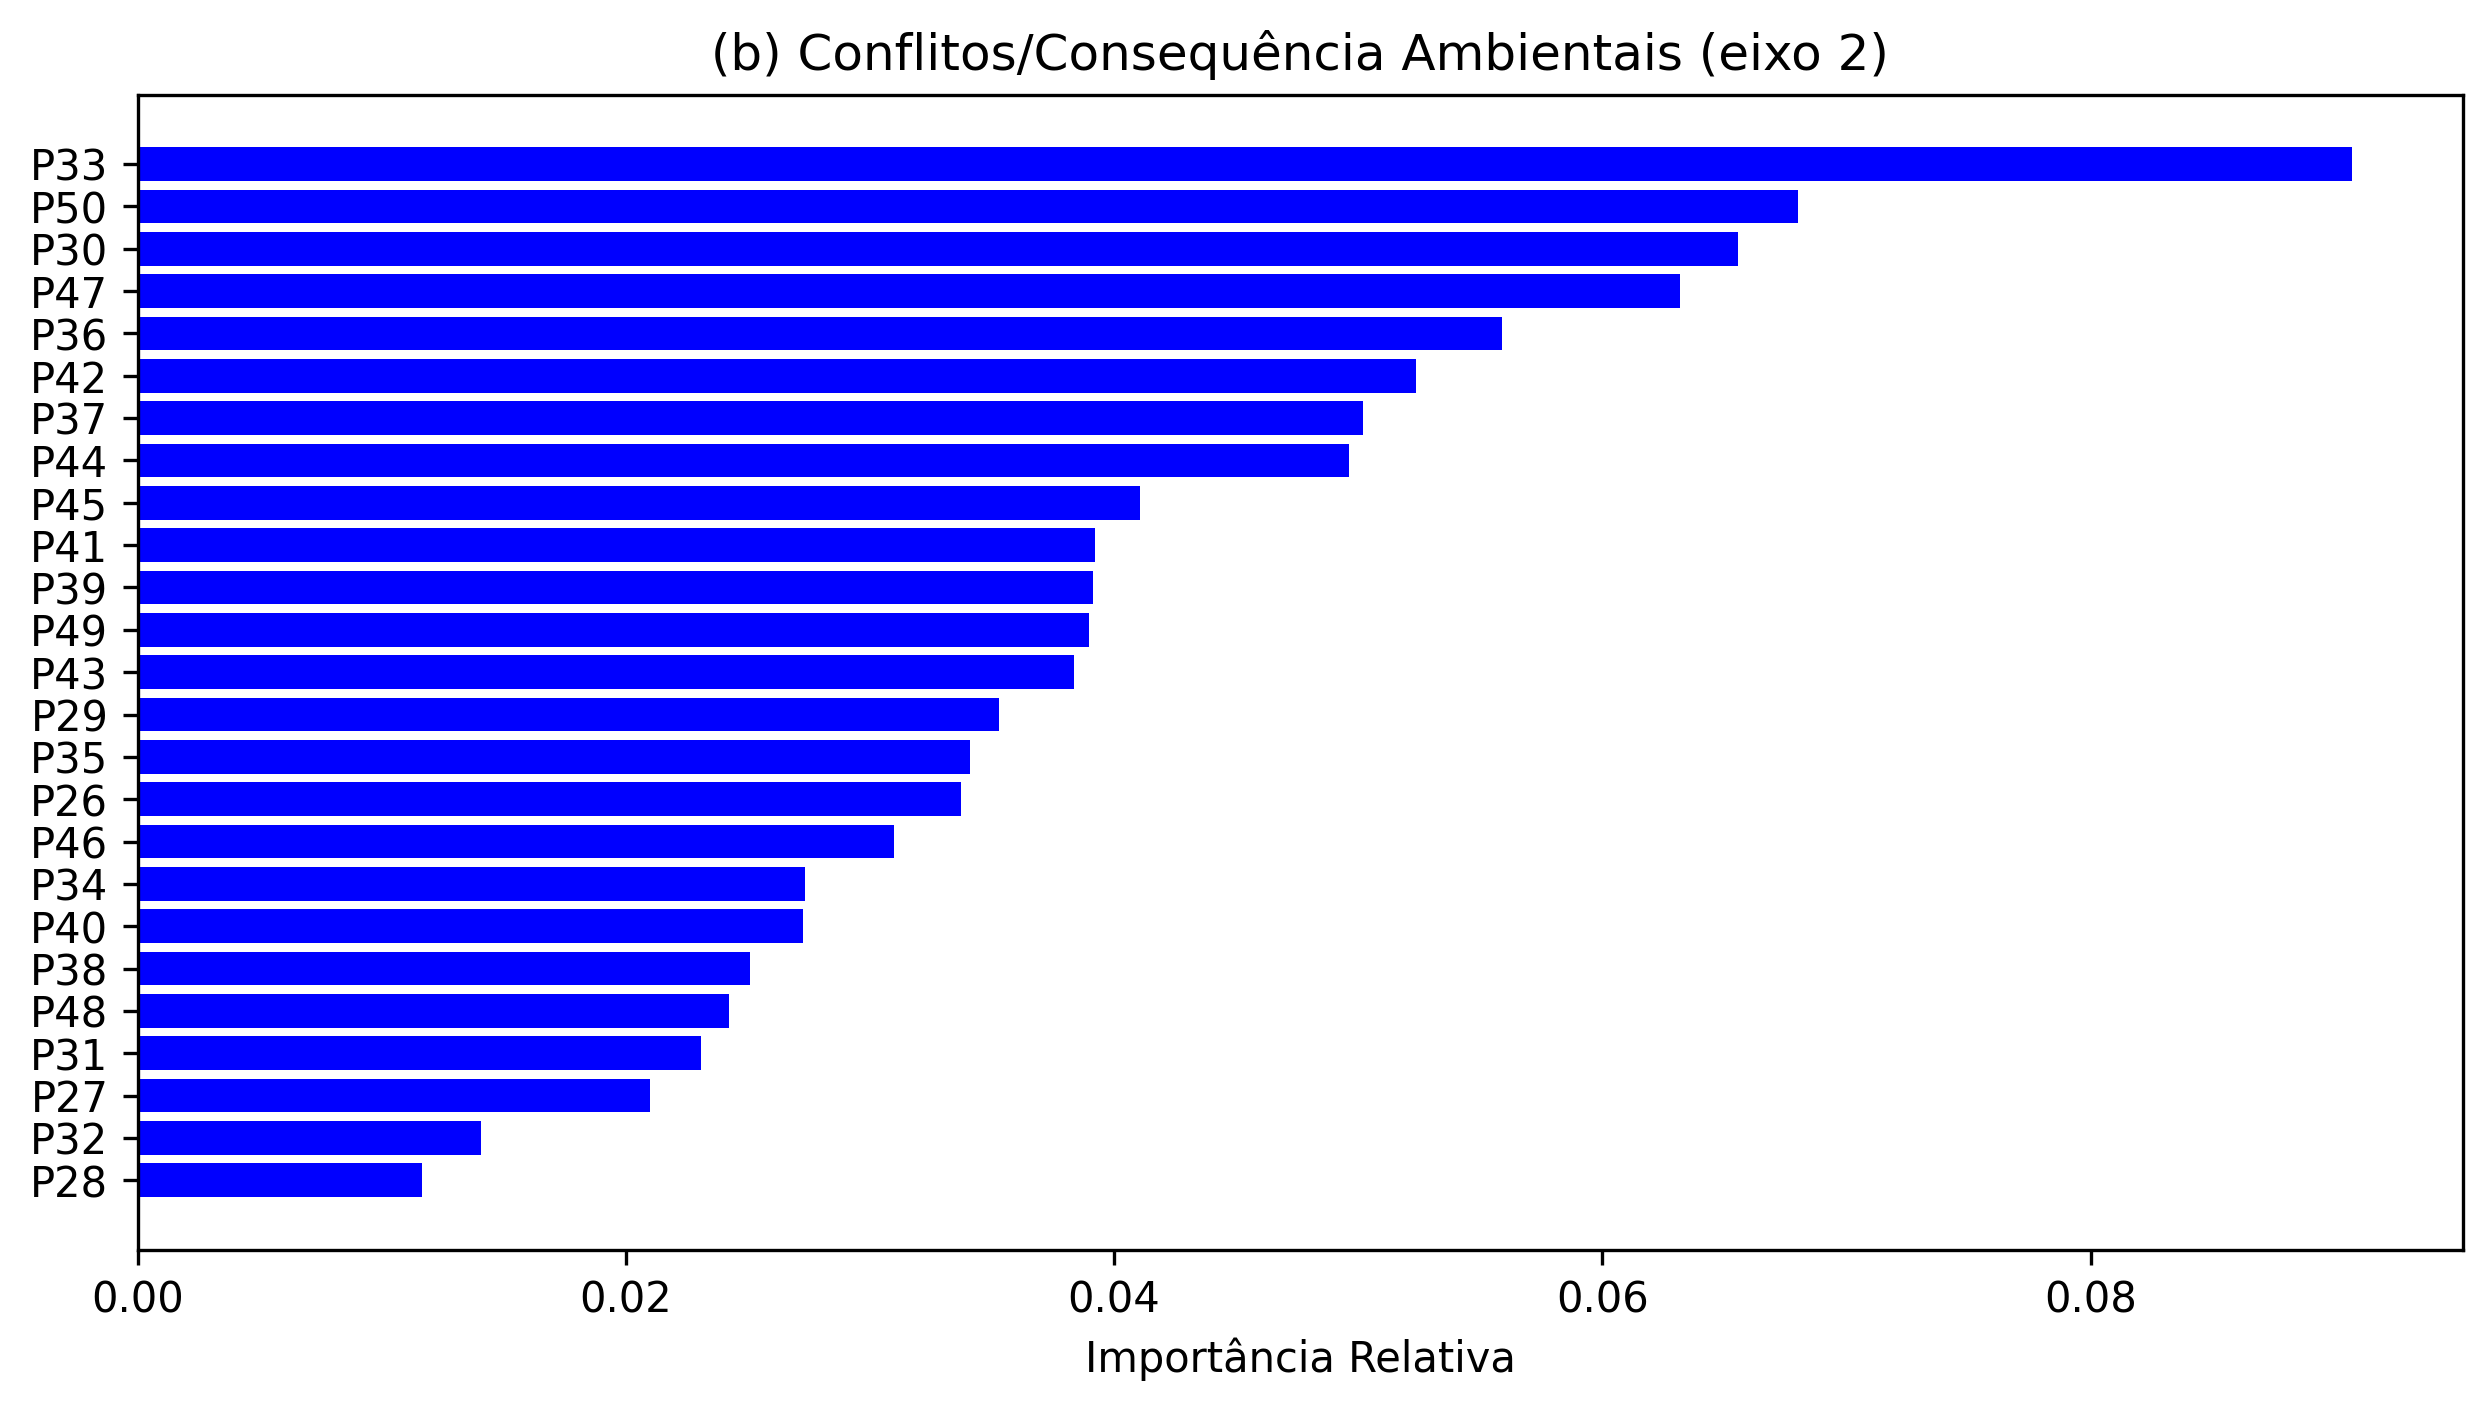

In [ ]:
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
labels = X.columns[indices]

# Criar o gráfico
plt.figure(figsize=(10, 5), dpi=300)
plt.title('(b) Conflitos/Consequência Ambientais (eixo 2)')
plt.barh(range(X.shape[1]), importances[indices], color='b', align='center')
plt.yticks(range(X.shape[1]), labels)
plt.xlabel('Importância Relativa')
plt.gca().invert_yaxis()
plt.show()

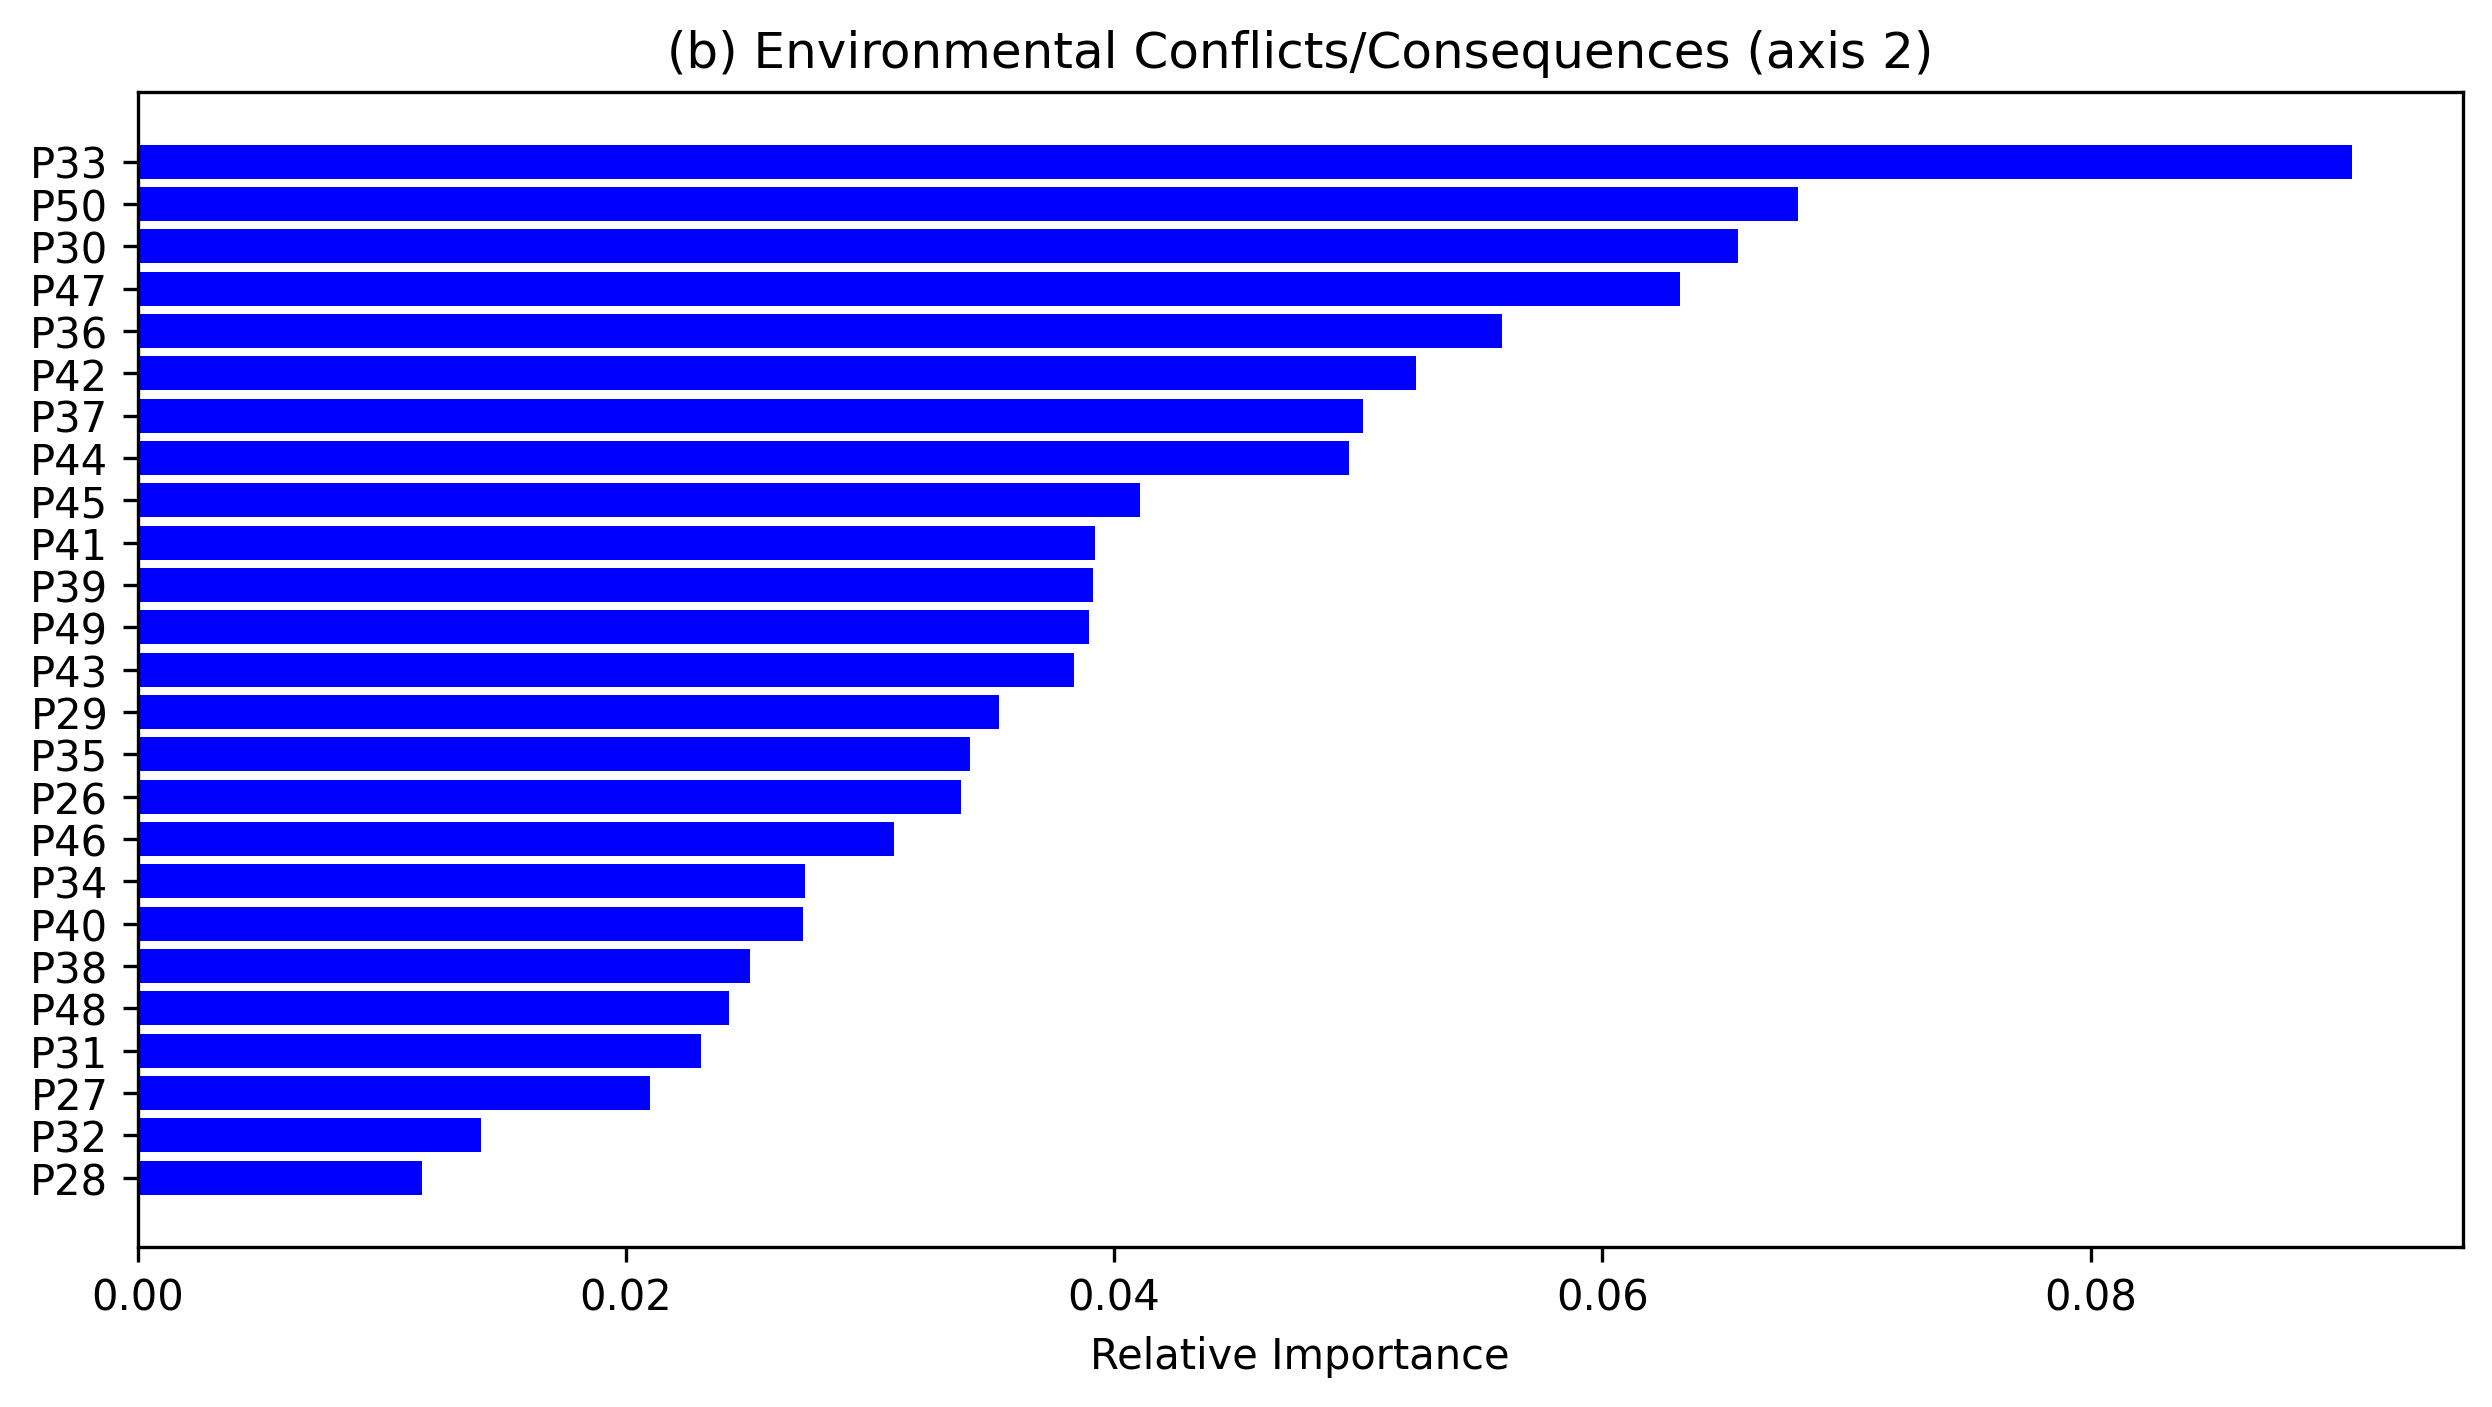

In [ ]:
# Criar o gráfico
plt.figure(figsize=(10, 5), dpi=300)
plt.title('(b) Environmental Conflicts/Consequences (axis 2)')
plt.barh(range(X.shape[1]), importances[indices], color='b', align='center')
plt.yticks(range(X.shape[1]), labels)
plt.xlabel('Relative Importance')
plt.gca().invert_yaxis()
plt.show()

### Montando a árvores com as features filtradas

As 12, 11 ou 9 primeiras tiverem acurácia boa, mas com 11 features foi superior as demais

In [10]:
colunas = ['P43', 'P49', 'P39', 'P41', 'P45', 'P44', 'P37', 'P42', 'P36', 'P47', 'P30','P50', 'P33', "perfil"] #'P43', 'P49', 'P45', 'P44', 'P37', 'P42', 'P36', 'P47', 'P30','P50', 'P33'
eixo_2_ = eixo_2[colunas]
eixo_2_

,P43,P49,P39,P41,P45,P44,P37,P42,P36,P47,P30,P50,P33,perfil
0,4,3,3,3,3,5,5,2,3,3,4,3,3,quilombola
1,3,3,3,4,4,5,3,5,3,1,4,3,2,quilombola
2,5,2,3,3,3,5,4,3,3,1,3,2,2,quilombola
3,4,4,4,3,4,5,4,3,2,3,2,3,3,quilombola
4,5,5,3,3,5,5,1,3,3,3,3,1,3,quilombola
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,5,5,5,5,5,5,3,1,1,5,2,5,5,fishermen
166,1,3,5,5,5,5,1,1,1,2,2,3,5,fishermen
167,1,5,5,5,5,5,1,3,1,1,2,5,4,fishermen
168,5,5,5,4,5,5,1,1,1,3,3,5,5,fishermen


In [11]:
X_ = eixo_2_.drop("perfil", axis=1)
y_ = eixo_2_["perfil"]
X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.2, random_state=42)

In [12]:
from sklearn.tree import ExtraTreeClassifier

param_grid = {
    'criterion': ['entropy', 'gini'],
    'max_depth': [None, 5, 8, 10],
    'min_samples_split': [2, 5, 8, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt', 'log2', None],
    'class_weight': ['balanced', None]
}

#clf = DecisionTreeClassifier(random_state=42)
clf = ExtraTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, verbose=1, scoring='accuracy')
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


GridSearchCV(cv=5, estimator=ExtraTreeClassifier(random_state=42),
             param_grid={'class_weight': ['balanced', None],
                         'criterion': ['entropy', 'gini'],
                         'max_depth': [None, 5, 8, 10],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 8, 10]},
             scoring='accuracy', verbose=1)

In [13]:
print("Melhores parâmetros:", grid_search.best_params_)
best_clf = grid_search.best_estimator_

Melhores parâmetros: {'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5}


In [14]:
# Previsões do melhor modelo
y_pred = best_clf.predict(X_test)
print("Acurácia:", accuracy_score(y_test, y_pred))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred))

Acurácia: 0.7647058823529411
Relatório de Classificação:
                        precision    recall  f1-score   support

extractivists/farmers       0.58      1.00      0.74         7
            fishermen       1.00      0.57      0.73         7
           indigenous       0.60      0.75      0.67         4
           quilombola       0.91      0.83      0.87        12
                urban       1.00      0.50      0.67         4

             accuracy                           0.76        34
            macro avg       0.82      0.73      0.73        34
         weighted avg       0.84      0.76      0.77        34



In [15]:
best_clf.get_n_leaves()

np.int64(42)

In [16]:
best_clf.get_depth()

10

### Visualizando

In [17]:
column_names = X_.columns
target_names = eixo_2['perfil'].unique()

In [18]:
print(target_names)

['quilombola' 'indigenous' 'fishermen' 'urban' 'extractivists/farmers']


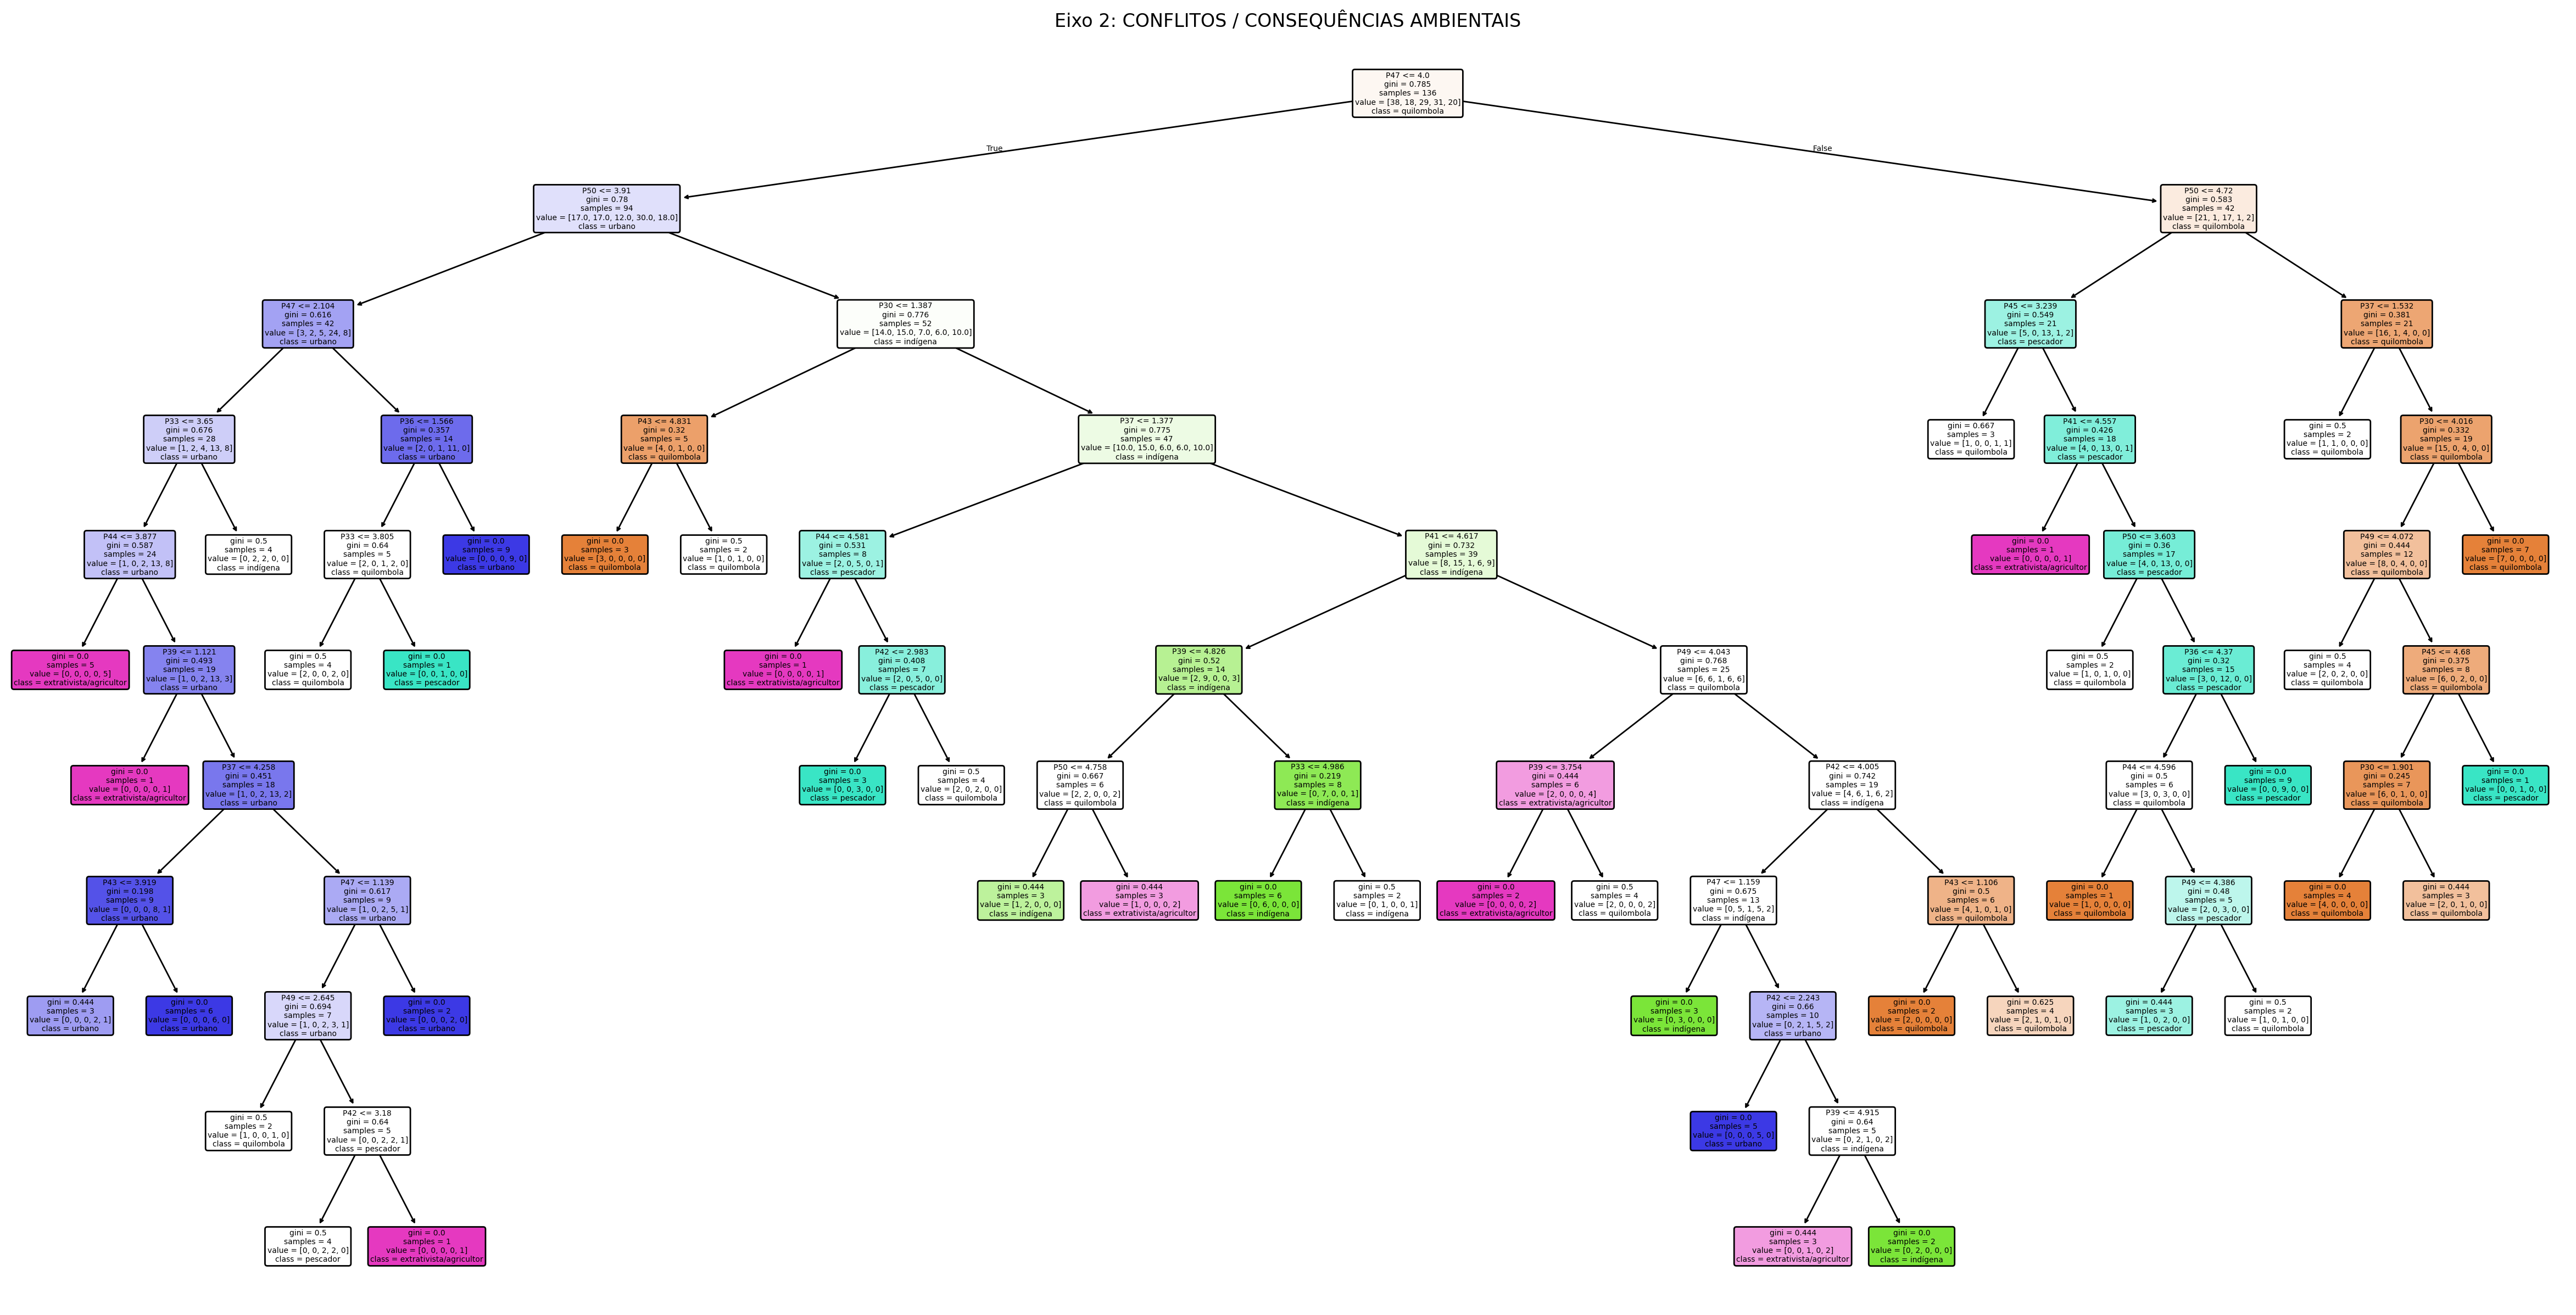

In [ ]:
plt.figure( figsize=(30,15),dpi=200)
plot_tree(best_clf,feature_names=column_names,
                      class_names=target_names,
                      filled=True, rounded=True,fontsize=5
                    )
plt.title("Eixo 2: CONFLITOS / CONSEQUÊNCIAS AMBIENTAIS")
plt.show()

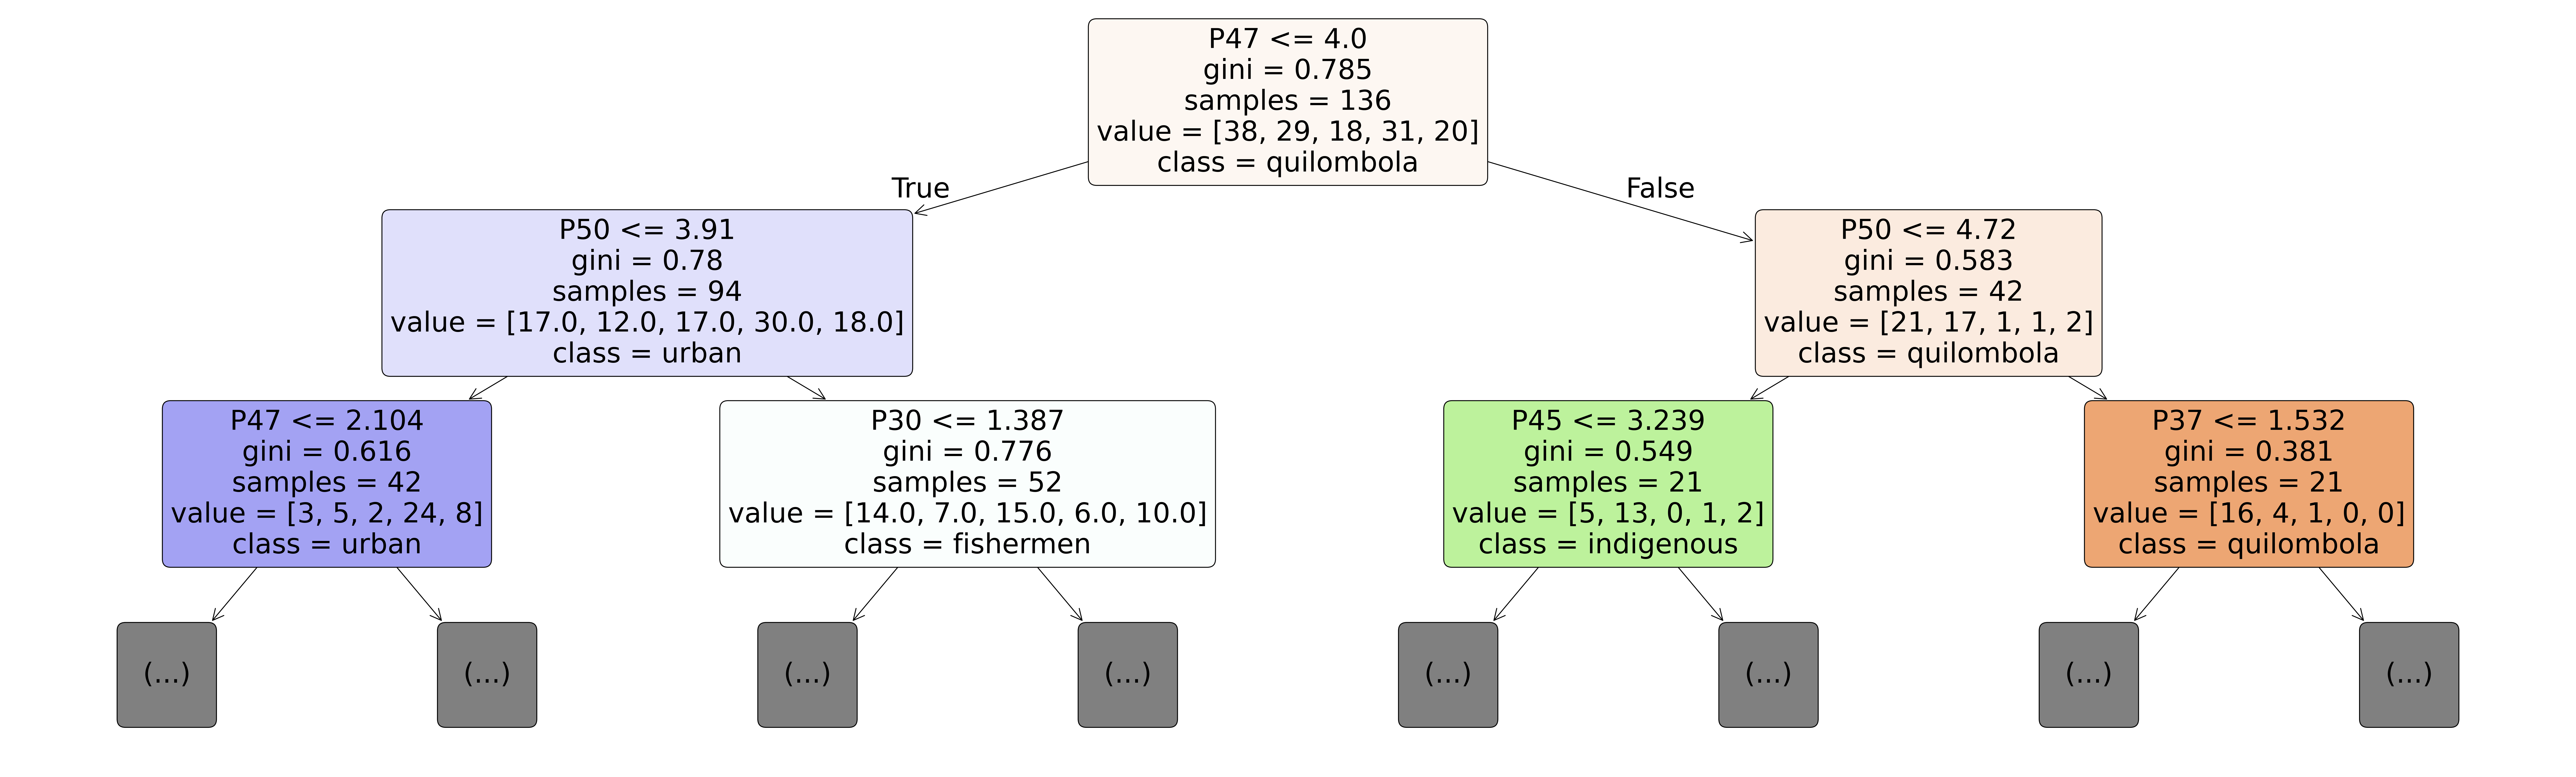

In [19]:
plt.figure( figsize=(50,15),dpi=300)
plot_tree(best_clf,feature_names=column_names,
                      class_names=target_names,
                      max_depth=2,
                      filled=True, rounded=True,fontsize=30
                    )
#plt.title("Eixo 2: CONFLITOS / CONSEQUÊNCIAS AMBIENTAIS")
plt.show()

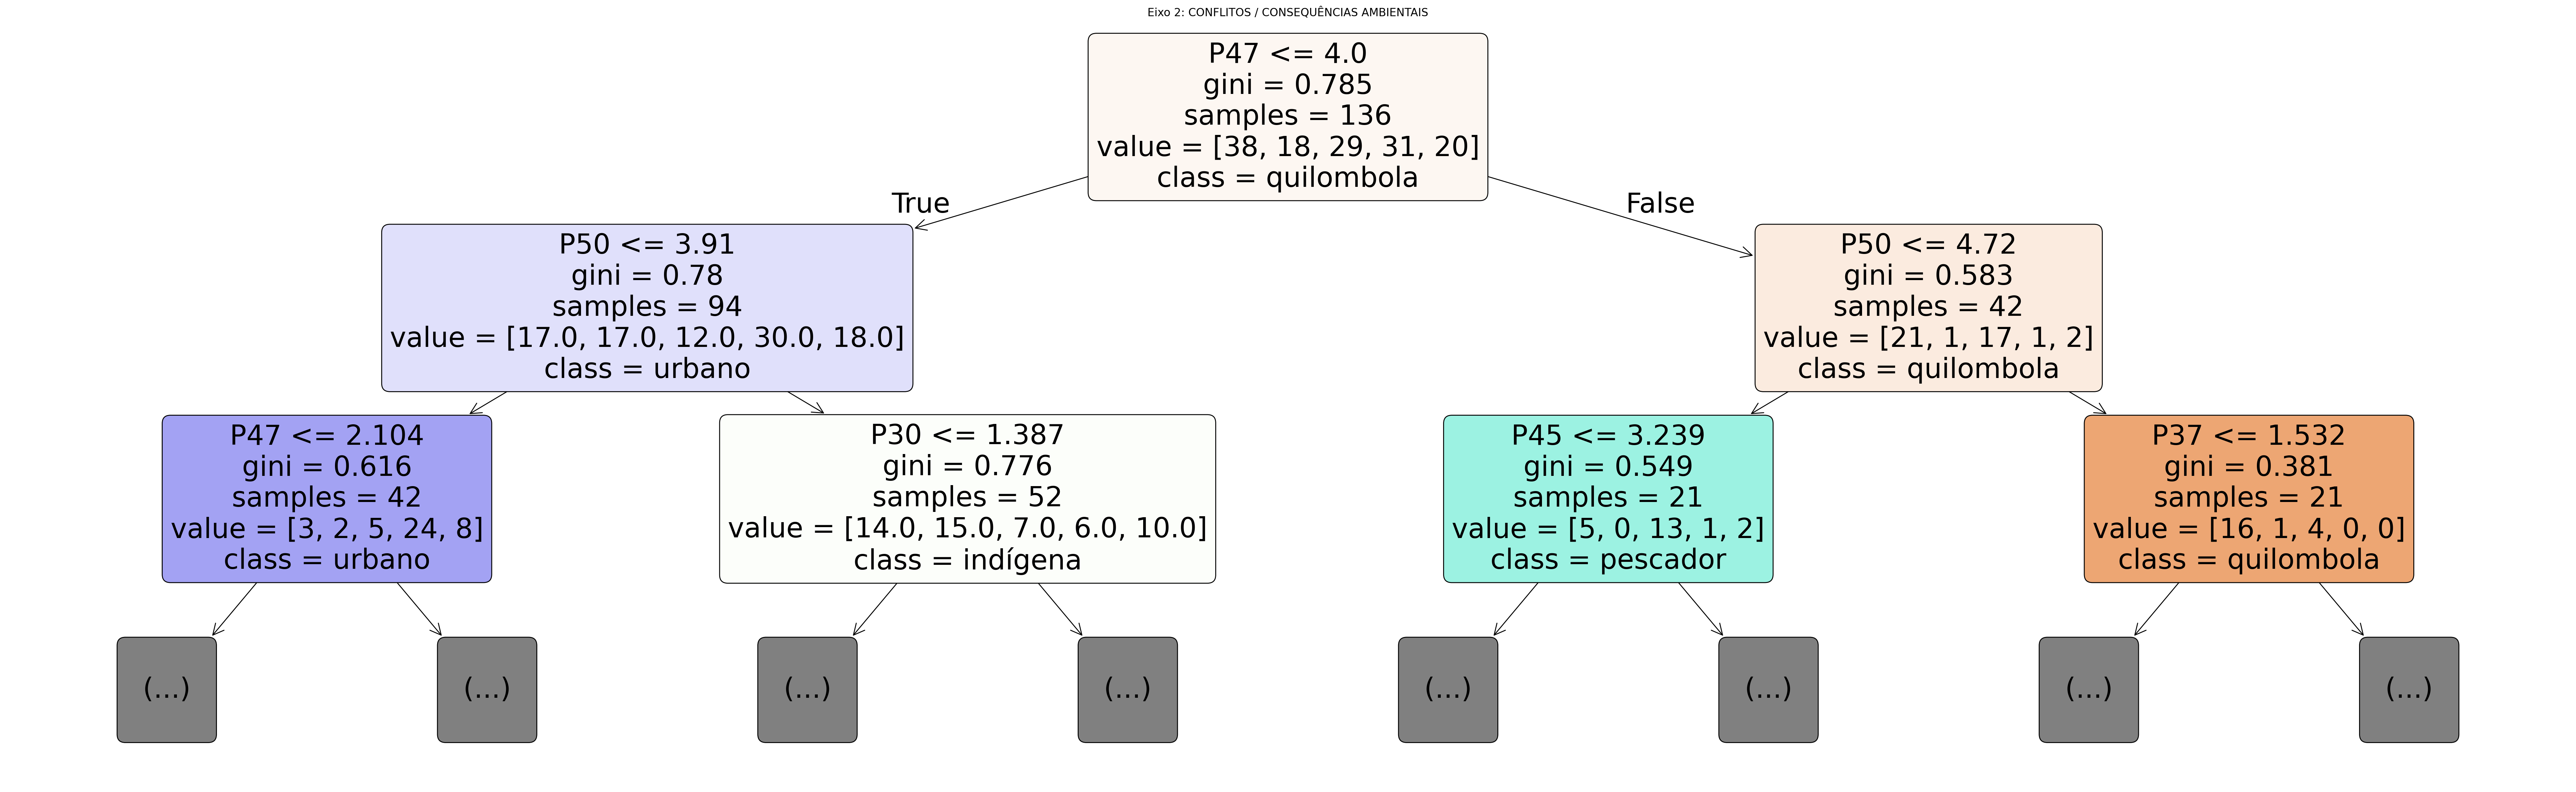

In [ ]:
plt.figure( figsize=(50,15),dpi=200)
plot_tree(best_clf,feature_names=column_names,
                      class_names=target_names,
                      max_depth=2,
                      filled=True, rounded=True,fontsize=30
                    )
#plt.title("Eixo 2: CONFLITOS / CONSEQUÊNCIAS AMBIENTAIS")
plt.show()

In [ ]:
from sklearn.tree import export_text

tree_text = export_text(best_clf, feature_names=column_names)
print(tree_text)

|--- P47 <= 4.00
|   |--- P50 <= 3.91
|   |   |--- P47 <= 2.10
|   |   |   |--- P33 <= 3.65
|   |   |   |   |--- P44 <= 3.88
|   |   |   |   |   |--- class: urbano
|   |   |   |   |--- P44 >  3.88
|   |   |   |   |   |--- P39 <= 1.12
|   |   |   |   |   |   |--- class: urbano
|   |   |   |   |   |--- P39 >  1.12
|   |   |   |   |   |   |--- P37 <= 4.26
|   |   |   |   |   |   |   |--- P43 <= 3.92
|   |   |   |   |   |   |   |   |--- class: quilombola
|   |   |   |   |   |   |   |--- P43 >  3.92
|   |   |   |   |   |   |   |   |--- class: quilombola
|   |   |   |   |   |   |--- P37 >  4.26
|   |   |   |   |   |   |   |--- P47 <= 1.14
|   |   |   |   |   |   |   |   |--- P49 <= 2.64
|   |   |   |   |   |   |   |   |   |--- class: extrativista/agricultor
|   |   |   |   |   |   |   |   |--- P49 >  2.64
|   |   |   |   |   |   |   |   |   |--- P42 <= 3.18
|   |   |   |   |   |   |   |   |   |   |--- class: pescador
|   |   |   |   |   |   |   |   |   |--- P42 >  3.18
|   |   |   |   |   | 